In [2]:
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F

import cv2
import matplotlib.pyplot as plt

/Users/naiy/miniconda3/envs/newtorch/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [28]:
class GeneralNet(nn.Module):
    """
    state image feature extraction
    """
    def __init__(self, in_ch = 1) -> None:
        super(GeneralNet, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_ch, 8, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(8),
            nn.ReLU(),
            nn.Conv2d(8, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )
        self.avg_pool = nn.AvgPool2d(2, 2)

    def forward(self, input):
        output = self.conv(input)
        print("shape", output.shape)
        output = self.avg_pool(output)
        return output

140.7625 (16, 10) [[102 102 102 133 160 160 160 160 167 175]
 [102 102 102 133 160 160 160 160 166 175]
 [102 102 102 133 160 160 160 160 164 175]
 [102 102 102 133 160 160 160 160 163 175]
 [102 102 102 133 160 160 160 160 162 175]
 [102 102 102 133 160 160 160 160 161 175]
 [100 100 100 132 160 160 160 160 160 175]
 [100 100 100 132 160 160 160 160 160 173]
 [100 100 100 132 160 160 160 160 160 173]
 [100 100 100 132 160 160 160 160 160 171]
 [100 100 100 132 160 160 160 160 160 170]
 [100 100 100 132 160 160 160 160 160 169]
 [100 100 100 132 160 160 160 160 160 168]
 [100 100 100 132 160 160 160 160 160 166]
 [100 100 100 132 160 160 160 160 160 166]
 [100 100 100 132 160 160 160 160 160 164]]
34.27736108044038 nan


/Users/naiy/miniconda3/envs/newtorch/lib/python3.8/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/naiy/miniconda3/envs/newtorch/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/Users/naiy/miniconda3/envs/newtorch/lib/python3.8/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


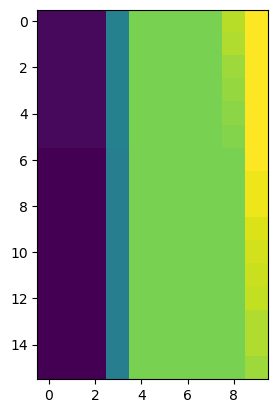

In [126]:
img = np.load('./sarr.npy')
# img = img[:84, :84]
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# img = img[61:77, 50:60]
# img = img[61:77, 40:56]
img = img[61:77, 55:65]
img_right = img[61:77, 51:56]
# img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# print(img.shape)
print(np.mean(img), img.shape, img)
print(np.std(img_left), np.std(img_right))
plt.imshow(img)
plt.show()

In [61]:
cv2.imshow('result', img)
cv2.waitKey(0)

In [35]:
d = torch.distributions.Normal(torch.Tensor([1, 0.5]), torch.Tensor([1, 0.5]))
a = d.sample()
alog = d.log_prob(a)
a, alog

(tensor([2.7533, 0.5644]), tensor([-2.4560, -0.2341]))

In [57]:
t = torch.Tensor([-0.0948, -0.0737, -0.0366])
torch.stack([t, t+1])

tensor([[-0.0948, -0.0737, -0.0366],
        [ 0.9052,  0.9263,  0.9634]])

In [6]:
img = torch.Tensor(img).permute(2, 0, 1)
img = img.unsqueeze(0)
img.shape

NameError: name 'img' is not defined

In [32]:
img = torch.Tensor(img)
img = img.unsqueeze(0).unsqueeze(0)
img.shape

torch.Size([1, 1, 84, 84])

In [33]:
net = GeneralNet()
out = net(img)
out.shape

shape torch.Size([1, 256, 3, 3])


torch.Size([1, 256, 1, 1])

In [49]:
out.max(), out.min()

(tensor(1.4377, grad_fn=<MaxBackward1>), tensor(0., grad_fn=<MinBackward1>))